# Introduction to Standard Q-learning

Reinforcement learning is the umbrella term for machine learning methods to learn by trial and error. 

In this paradigm, an **agent** receives two kinds of signals from the environment it is placed in: 
1. the **state** (or in the partial case, **observation**) from that environment. This is an actionable representation of the environment; and 
2. the **reward** for actions it takes in that environment. 

It is safe to say that an **action**, in this context, is any manipulation from the agent in that environment that can change the state and request a reward value.

The actions of an agent are determined by its internal rules, called the **policy** of the agent. 

The ultimate goal of the agent is to maximise the return (the total reward over a run or trajectory) and by so doing learn a task.

Therefore, unlike supervised learning where a model is expected to predict an outcome given a labeled representation of similar incomes or unsupervised learning where a model makes <ins>inferences</ins> on data without labels, reinforcement learning is more bootstrapped and <ins>experimental</ins>.


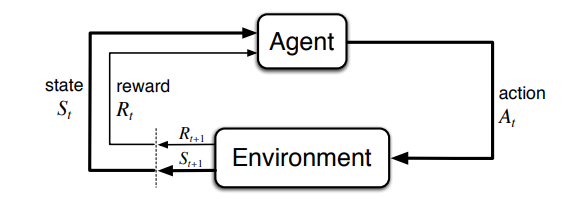

[Source: Sutton & Barto](http://incompleteideas.net/book/the-book-2nd.html)  

As can be seen above, the agent takes an action and receives a reward and a new state. 
An effective policy determines the action it takes to increase the number of rewards it receives over time.
Rewards can be negative, neutral or positive but the environment is designed so that the agent increases its rewards when it 
performs its task. The result of this system is an agent 'learning' the right behavior.

## Definition
There are a number of algorithms to train this agent but the focus for this post is the standard Q-learning algorithm.

> Standard Q-Learning is an off-policy, temporal-difference, value-based, tabular algorithm for solving reinforcement learning tasks. 

Yikes! That feels like a long  description but it helps with classifying algorithms. Let's unwind the thread by breaking down the terms:




#### 1. Off-Policy
 To learn a task an agent needs to learn the value of different actions or states toward achieving its goal. It also needs to choose actions/states based on the values it has learned. The policy it uses to try states or state-action pairs in order to quantify them is called its **behavior** or **updating** policy because it is used in training. The policy it uses to act is called its **target** or **acting** policy.  Some algorithms, like sarsa, use the same policy for both acting and updating. Q-learning, however, uses a separate policy to learn from the one it uses to select actions.  

#### 2. Temporal-difference
 Think of the approach to learn the value of the current state/action as a spectrum. One extreme end is the algorithm learning the value of the current state/action by observing the reward in the next state. The other end of the spectrum is learning the long-term value of the current state by considering all the following states if you follow the acting policy. Observe the figure below:

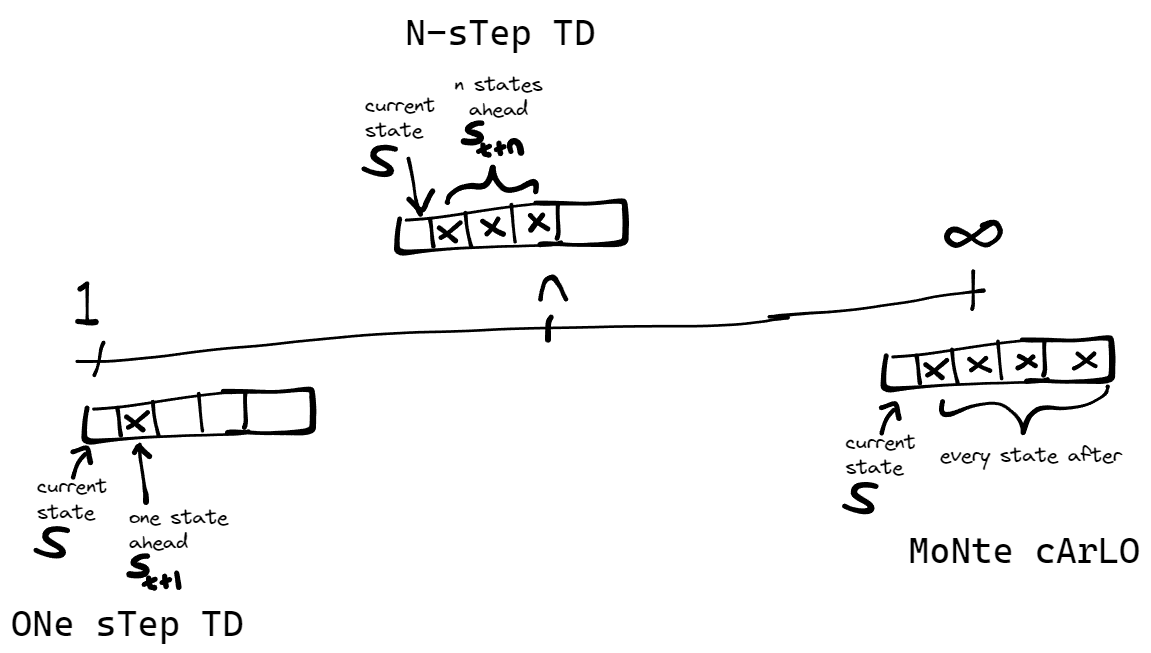

One-step **temporal difference** is the left end. In temporal difference methods like Q learning, sarsa, expected sarsa and n-step TD, the agent's internal valuation of a state/action is determined by how much choosing this state/action influences reward collection over the next couple states or state-action pairs. It may seem daunting but the code is easy and we'll get to it in a bit.  

The right end summarizes **Monte Carlo** methods. Monte Carlo methods value a state/action by exhaustion. This means that, to quantify the value of the current state, the agent will average the returns starting from that state or state-action pair till the end of the task (if it is episodic). 

One distinct implication of choosing Monte Carlo methods is that, a state or state-action pair may not be judged useful if the returns at the end of the episode (when you choose that state or state-action pair) are little compared to sibling states or state-action pairs. However, under a TD algorithm, if only the immediate state after yields a high return, that state or state-action pair will be valued higher.  

In between both ends on the pictured spectrum is the n-step TD. You can already guess why they're called so — they look more than one step ahead, but not till the end of the episode. They combine the strengths of both TD and Monte Carlo methods and try to avoid some pitfalls either kind causes.



#### 3. Value-based 
As opposed to policy-based reinforcement learning algorithms, value-based algorithms do not learn a policy explicitly. Instead, it learns a value function from which we can derive a policy.

#### 4. Tabular
Standard Q-Learning uses a 'lookup' table to guide its action-making. The updating policy populates this table, called the Q-table and once training is complete, uses the acting policy to determine actions given a state. The acting policy uses the greedy approach to select actions i.e it selects the action with the highest q-value for the current state.
  




## Understanding a Few More Concepts
Before we get into the code, there are a couple more concepts to assimilate, that will hopefully seed the concepts above in concrete:

### The Exploration-exploitation tradeoff:
Here's an analogy: there's a fried chicken spot on the way to work and the food's just okay. You don't necessarily lick the paper plates you get served in but you can't complain. Now, a colleague puts you on to an Amala spot a little out of the way. 'It's amala,' you think, 'if it's any good, it'll be leagues above chicken in a paper plate.'  
 
Everyday you go to the chicken place, knowing it is better than your current options, you are said to be **exploiting**. If you put in some effort to try the amala spot, you may discover it offers better value for your money and time (but there's also the chance this is false). Navigating to the amala spot is called **exploring**. This concept is useful in many areas, like reinforcement learning.

During training, to avoid the pitfall of learning the quality of one state-action pair and neglecting (possibly better) alternatives, it is useful to explore and come by a fair score of as many actions as possible. Say hi to one way to do this — the epsilon-greedy policy (written ε-greedy):


> Greedy action selection always exploits current
knowledge to maximize immediate reward; it spends no time at all sampling apparently
inferior actions to see if they might really be better. A simple alternative is to behave
greedily most of the time, but every once in a while, say with small probability ε, instead select randomly from among all the actions with equal probability, independently of the action-value estimates. We call methods using this near-greedy action selection rule
ε-greedy methods (Sutton & Barto)

Following the analogy described earlier, if your decision to go to a shop depends on the results of a coin flip, the value of epsilon would, theoretically, be 0.5. At ε=0.5, half the time, you'll go to the chicken spot you're sure of. The other half of the time, you pick a place at random so you may eventually pick the amala spot and see if that's better. So that your decision is random, you can have your pet, or someone else's pet make the decision for you somehow!

### Epsilon Decay
As we progress through training, we want to explore less. Why? Having built some intuition around the action-values, we want to reduce the randomness of action selection in order to get closer to convergence.  
While there are a couple ways to decrease the value of `ε` over time (this is called **annealing**), in the code below I used a linear decay scheme: up until a timestep which will be calculated using the exploration fraction (an argument provided by the user), `ε` decrements uniformly from a maximum value to a minimum value (both also passed as arguments). After this timestep, `ε` constantly remains at its minimum value, reducing the rate of exploration but not stopping it.


### The Q-learning Algorithm
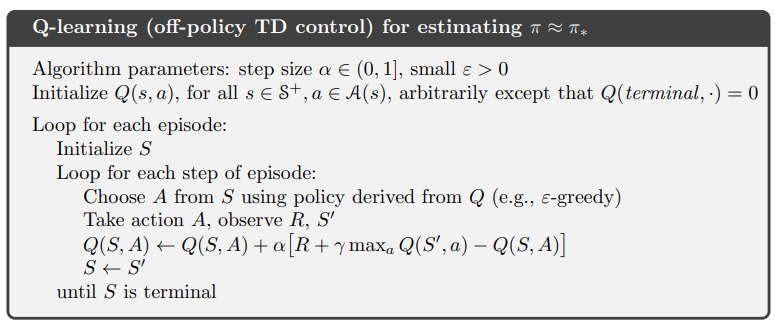


The training loop for the standard q-learning algorithm is quite simple:
1. Initialize the learning rate, α.  
 This value determines by how much updates to an action-value should be made. If the value of α is too large, updates could take giant skips and miss the optimal values, thus never converging. If the value is too small, the action-values will take too long to converge. **Convergence** occurs when the algorithm is no longer learning. 
2. Initialize the q-table arbitrarily  
In theory, q-learning has been proven to converge to optimal action-values. We can therefore initialize our q-table to arbitrary values. **Training** occurs when we update this table.
3. For each episode of the training loop:  
    a. initialize the starting state  
    b. For each step of the current episode:  
      i. use the acting policy to select an action (i.e the ε-greedy policy)  
      ii. record the reward obtained and the next state value  
      iii. update the q-value of the current state using the formula:
      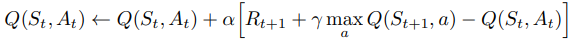  
      c. update the state to the new state

### Understanding the update rule
Update rules are usually of the form:  
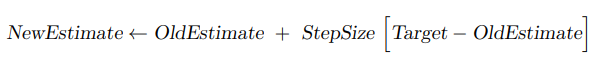  



Step 3b(ii) above is q-learning's version of the update rule, where the magic happens.  Let's understand how it happens, starting with the values in the parentheses.  

 To evaluate the q-value of a state-action pair (perhaps now is a good time to state that 'q' stands for the <ins>quality</ins> of a state action pair), the algorithm evaluates the **TD target** (which was described earlier to be the one-step return):  
    TD target = 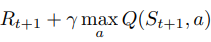  

which basically means the current reward plus the discounted q-value of the a state-action pair for the immediate next state selected using the <ins>greedy</ins> method. It is because we use the greedy approach for the **updating** (as opposed to epsilon-greedy approach we used for **acting**) that q-learning is called an <ins>off-policy</ins> algorithm.

Having computed the one-step return, we need to know the direction we should change the current action-value: whether to increase or decrease it. Therefore, we subtract the old action-value from the newly computed TD target. This difference is called the **TD error**:


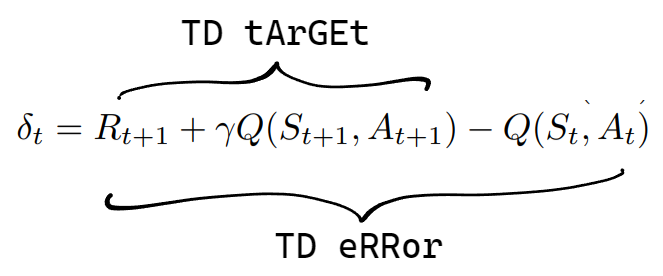

The value of TD error tells us whether to increase or decrease the action-value. If TD error is positive, the update step increases the action-value, otherwise it decreases it.  
The next thing is the step size, what we called learning rate earlier, or α (alpha).
α tells us by how much we should change the current action value, given that we know what direction we should change it. As stated earlier, it is important to choose a value that is not so large that we always skip the optimal value and not so small that it takes forever to converge.

Therefore, the update to the current action value will be a proportionate increase or decrease, allowing us to be able to change the action-value over the training loop.

## Implementing the Q-learning algorithm in code
Our q-learning algorithm will be implemented as a class `Q`, to tie things together. 


### Initialization
The `__init__` method (magic method used to customize an object) is called when an object is instantiated.
The `Q` object takes in a couple hyperparameter arguments:
- `env`: an environment of type `gym.Env` (the environment should subclass the `Env` class provided in the openai `gym` library, for standard use). In the next article, we will create a custom environment to solve using this q-learning algorithm.
- `min_epsilon`: a float value that will be the value of `ε` after annealing,
- `max_epsilon`: a float value that will be the value of `ε` before annealing,
- `exploration_fraction`: the fraction of the training timesteps over which to anneal `ε`,
- `lr`: a float value representing the step size/learning rate,
- `gamma`: a float value representing the discount rate

In [ ]:
def __init__(self, 
                env:Env,
                min_epsilon:float = 0.02,
                max_epsilon:float = 0.5,
                exploration_fraction:float = 0.4,
                lr:float = 0.7,
                gamma:float = 0.95):
    
    # store the environment
    self.env = env

    # create table
    self.qtable = np.zeros(shape=(self.env.n_states, self.env.n_actions))

    # set hyperparameters
    self.lr = lr
    self.gamma = gamma
    self.min_epsilon = min_epsilon
    self.max_epsilon = max_epsilon
    self.exploration_fraction = exploration_fraction

### `greedy_policy` and `epsilon_greedy_policy` 
The logic for exploitation and exploration is written in both methods:

In [ ]:
def greedy_policy(self):
        '''
        Choose the action with the highest q-value for that state
        '''
        return np.argmax(self.qtable[self.state])
        
def epsilon_greedy_policy(self, epsilon):
        '''
        Choose any action sometimes, other times choose the one with high q-value
        '''
        # generate probability value to match epsilon against
        rando = random.uniform(0,1)

        # if value < epsilon, explore (because we will be decaying epsilon gradually)
        if rando < epsilon:
            action = self.env.action_space.sample()
        # else, exploit
        else:
            action = np.argmax(self.qtable[self.state])
        
        return action

### The `train` method
The `train` method takes a single argument: the hyperparameter `train_episodes` which is the number of episodes to learn a given task.  
The training follows this logic:
1. Determine the number of timestamps to anneal `ε` using `exploration_fraction` and `train_episodes`. Store this value as `n_exploration_timesteps`
2. Create an array `epsilon_values` to contain evenly-spaced values of epsilon over `n_exploration_timesteps`. The array begins with `max_epsilon` and ends with `min_epsilon`
3. For each episode, run the following loop:  
    i. Evaluate `epsilon`. If `n_exploration_timesteps` has not been existed, supply the next element of the `epsilon_values` array. Else, set `epsilon` to `min_epsilon`
    ii. reset the environment and store the starting state
    iii. while the episode is not done, supply an action using the acting policy, receive rewards and a new state and perform qtable updates with these values using the updating policy
    iv. move to the new state and repeat

In [ ]:
def train(self, train_episodes:int = 5000): 
        
        # calculate the number of timesteps to anneal exploration
        self.n_exploration_timesteps = int(self.exploration_fraction * train_episodes )
        self.epsilon_values = np.linspace(self.max_epsilon, self.min_epsilon, self.n_exploration_timesteps)

        for episode in tqdm(range(train_episodes)):
            # adjust epsilon
            # self.epsilon = self.min_epsilon + (self.max_epsilon-self.min_epsilon)*np.exp(-self.decay_rate*episode)
            if episode < self.n_exploration_timesteps:
                self.epsilon = self.epsilon_values[episode]
            else:
                self.epsilon = self.min_epsilon

            self.state, _ = self.env.reset(verbose=False) # reset the episode
            
            #train loop
            while not self.env.done:
                # print(self.state)
                if episode < self.n_exploration_timesteps:
                    self.action = self.env.action_space.sample()
                else:
                    self.action = self.greedy_policy()

                # take an ε-greedy action
                # self.action = self.epsilon_greedy_policy(self.epsilon) # uncomment this
                self.new_state, reward, done, info = self.env.step(self.action)
                
                # update self.qtable using Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
                self.td_target = reward + self.gamma*np.max(self.qtable[self.new_state]) # compute the one-step return
                self.td_error = self.td_target - self.qtable[self.state][self.action]
                self.qtable[self.state][self.action] = self.qtable[self.state][self.action] + (self.lr * self.td_error)
  
                # # Render the env
                # self.env.render()
                # # Wait a bit before the next frame 
                # sleep(0.001)

                # if done, terminate
                if done:
                    break

                self.state = self.new_state

### Visualizing the Q-Table
Below is the logic to visualize the q-table using `seaborn` a visualization library

In [ ]:
def show(self):
    # plot the qtable as a heatmap
    plt.figure(figsize=(10,5))
    plt.title(f'Qtable for {self.env.name} environment')
    ax = sns.heatmap(self.qtable, annot=True, linecolor='pink', linewidths=0.2, cmap='Greys')
    ax.set(xlabel='angle(°)', ylabel='target distance(m)') # label axes
    plt.xticks(ticks=np.arange(self.env.n_actions)+0.5, labels=self.env.action_to_angle.values(), ha='center') # change xticks to angles
    state_to_target = {j:i for i,j in self.env.target_to_state.items()}
    plt.yticks(ticks=np.arange(self.env.n_states)+0.5, labels=state_to_target.values(), va='center')

## Putting it all together: the `Q` class

In [ ]:
class Q():
    def __init__(self, 
                 env:Env,
                 min_epsilon:float = 0.02,
                 max_epsilon:float = 0.5,
                 exploration_fraction:float = 0.4,
                 lr:float = 0.003,
                 gamma:float = 1.0):
        
        # store the environment
        self.env = env

        # create table
        self.qtable = np.zeros(shape=(self.env.n_states, self.env.n_actions))

        # set hyperparameters
        self.lr = lr
        self.gamma = gamma
        self.min_epsilon = min_epsilon
        self.max_epsilon = max_epsilon
        self.exploration_fraction = exploration_fraction
        
       

    def greedy_policy(self):
        '''
        Choose the action with the highest q-value for that state
        '''
        return np.argmax(self.qtable[self.state])


    def epsilon_greedy_policy(self, epsilon):
        '''
        Choose any action sometimes, other times choose the one with high q-value
        '''
        # generate probability value to match epsilon against
        rando = random.uniform(0,1)

        # if value < epsilon, explore (because we will be decaying epsilon gradually)
        if rando < epsilon:
            action = self.env.action_space.sample()
        # else, exploit
        else:
            action = np.argmax(self.qtable[self.state])
        
        return action

    def train(self, train_episodes:int = 5000): 
        
        # calculate the number of timesteps to anneal exploration
        self.n_exploration_timesteps = int(self.exploration_fraction * train_episodes )
        self.epsilon_values = np.linspace(self.max_epsilon, self.min_epsilon, self.n_exploration_timesteps)

        for episode in tqdm(range(train_episodes)):
            # adjust epsilon
            # self.epsilon = self.min_epsilon + (self.max_epsilon-self.min_epsilon)*np.exp(-self.decay_rate*episode)
            if episode < self.n_exploration_timesteps:
                self.epsilon = self.epsilon_values[episode]
            else:
                self.epsilon = self.min_epsilon

            self.state, _ = self.env.reset(verbose=False) # reset the episode
            
            #train loop
            while not self.env.done:
                # print(self.state)
                if episode < self.n_exploration_timesteps:
                    self.action = self.env.action_space.sample()
                else:
                    self.action = self.greedy_policy()

                # take an ε-greedy action
                # self.action = self.epsilon_greedy_policy(self.epsilon) # uncomment this
                self.new_state, reward, done, info = self.env.step(self.action)
                
                # update self.qtable using Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
                self.td_target = reward + self.gamma*np.max(self.qtable[self.new_state]) # compute the one-step return
                self.td_error = self.td_target - self.qtable[self.state][self.action]
                self.qtable[self.state][self.action] = self.qtable[self.state][self.action] + (self.lr * self.td_error)
  
                # # Render the env
                # self.env.render()
                # # Wait a bit before the next frame 
                # sleep(0.001)

                # if done, terminate
                if done:
                    break

                self.state = self.new_state


    def __repr__(self):
        return f"Run the 'Q.show()' method to show the Qtable better\n{self.qtable}"
        
    def show(self, save_as:str):
        # plot the qtable as a heatmap
        plt.figure(figsize=(10,5))
        plt.title(f'Qtable for {self.env.name} environment')
        ax = sns.heatmap(self.qtable, annot=True, linecolor='pink', linewidths=0.2, cmap='Greys')
        ax.set(xlabel='angle(°)', ylabel='target distance(m)') # label axes
        plt.xticks(ticks=np.arange(self.env.n_actions)+0.5, labels=self.env.action_to_angle.values(), ha='center') # change xticks to angles
        state_to_target = {j:i for i,j in self.env.target_to_state.items()}
        plt.yticks(ticks=np.arange(self.env.n_states)+0.5, labels=state_to_target.values(), va='center')
        
        # save image to file
        if save_as:
            plt.savefig(save_as)

## Conclusion
For an extensive explanation of Q-learning and other algorithms , you can refer to any of the following resources:
1. The [Huggingface course on reinforcement learning](https://github.com/huggingface/deep-rl-class) (This is good. I am currently taking it. *wink wink)
2. [Reinforcement Learning: An Introduction](http://incompleteideas.net/book/the-book-2nd.html). A book by Richard S. Sutton and Andrew G. Barto (This is an excellent reinforcement learning theory material. At the time of writing this, I use this material to supplement my learning efforts).
3. The [Deepmind Reinforcement Learning Youtube playlist](https://youtube.com/playlist?list=PLqYmG7hTraZDVH599EItlEWsUOsJbAodm).

We will apply the `Q` class to a custom environment in the next article. See you then.